In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# optional magic command
%matplotlib inline

In [22]:
iris = load_iris()

In [23]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
print(iris.data.shape)
print(iris.data.dtype)

(150, 4)
float64


In [25]:
value = iris.data
condition = iris.feature_names

In [26]:
dta = pd.DataFrame(value, columns=condition)
dta

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
dta.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
dta_subset=dta.iloc[0:50,:]
dta_subset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [29]:
low = dta_subset["sepal length (cm)"].mean()-(dta_subset["sepal length (cm)"].std()*3.9)
high = dta_subset["sepal length (cm)"].mean()+(dta_subset["sepal length (cm)"].std()*3.9)
mask = np.logical_or(dta_subset["sepal length (cm)"]> high, dta_subset["sepal length (cm)"]<low)
dta_subset["sepal length (cm)"][mask]

Series([], Name: sepal length (cm), dtype: float64)

In [30]:
def outlier(x, sd = 3.9):
    """
    Find the extreme values.
    
    Parameters
    ----------
    x: string
        the variable you want to check
    sd: float
        the criteria of the number of sd
    """
    low = dta_subset[x].mean()-(dta_subset[x].std()*sd)
    high = dta_subset[x].mean()+(dta_subset[x].std()*sd)
    mask = np.logical_or(dta_subset[x]> high, dta_subset[x]<low)
    result = dta_subset[x][mask]
    return result

for item in condition:
    ans = outlier(item)
    print(ans)

Series([], Name: sepal length (cm), dtype: float64)
Series([], Name: sepal width (cm), dtype: float64)
Series([], Name: petal length (cm), dtype: float64)
Series([], Name: petal width (cm), dtype: float64)


In [31]:
def boxoutlier(x):
    """
    Find the extreme values.
    
    Parameters
    ----------
    x: string
        the variable you want to check
    """
    iqr = dta_subset[x].quantile(0.75)-dta_subset[x].quantile(0.25)
    low = dta_subset[x].quantile(0.25)-iqr*1.5
    high = dta_subset[x].quantile(0.75)+iqr*1.5
    mask = np.logical_or(dta_subset[x]> high, dta_subset[x]<low)
    result = dta_subset[x][mask]
    return result

for item in condition:
    ans = boxoutlier(item)
    print(ans)

Series([], Name: sepal length (cm), dtype: float64)
15    4.4
41    2.3
Name: sepal width (cm), dtype: float64
13    1.1
22    1.0
24    1.9
44    1.9
Name: petal length (cm), dtype: float64
23    0.5
43    0.6
Name: petal width (cm), dtype: float64


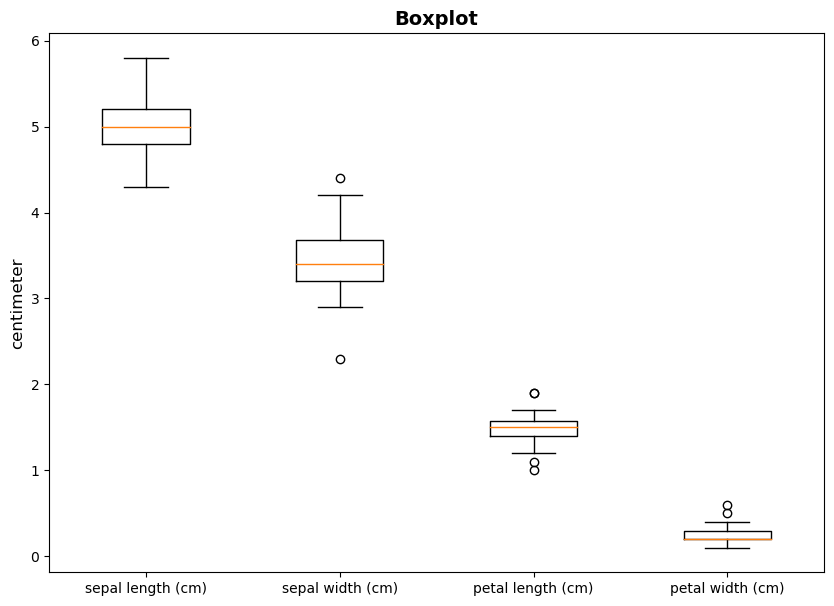

In [32]:
fig = plt.figure(figsize =(10, 7))
fig = plt.boxplot(dta_subset, labels= condition)
fig = plt.title('Boxplot', fontsize =14, fontweight='bold')
fig = plt.ylabel('centimeter', fontsize =12)
plt.savefig('Boxplot.png')
plt.show()

In [33]:
dta_subset.to_csv('Dataframe.csv')